# **Sentiment Analysis**

In [ ]:

# ! pip install nltk

# import nltk
# print(nltk.__version__)  # This should print the version of nltk installed


# import sys
# print(sys.executable)


# !{sys.executable} -m pip install nltk




# import nltk
# print(nltk.__version__)  # This should print the version of nltk installed


In [ ]:
# ! pip install textblob

# import sys
# print(sys.executable)

# !{sys.executable} -m pip install textblob


# from importlib.metadata import version
# print(version('textblob'))



In [3]:
! pip install wordcloud


# import sys
# print(sys.executable)

# !{sys.executable} -m pip install wordcloud

# import wordcloud
# print(wordcloud.__version__)

In [4]:
# ! pip install imblearn


# import sys
# print(sys.executable)

# !{sys.executable} -m pip install imblearn

# import imblearn
# print(imblearn.__version__)



---



# Libraries

**Data Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**NLP Text Libraries**

In [6]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**EDA Analysis**

In [7]:
# Text Polarity
from textblob import TextBlob # type: ignore

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud # type: ignore

**Feature Engineering**

In [8]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

**Model Selection and Evaluation**

In [9]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



---



# The Dataset

*Overall, the dataset talks about the feedback received after the customers purchased musical instruments*

**Read The Dataset**

In [10]:
dataset = pd.read_csv("Instruments_Reviews.csv")

In [11]:
dataset.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


**Shape of The Dataset**

In [12]:
dataset.shape

(10261, 9)

*From this, we can infer that the dataset consists of 10261 rows and 9 columns.*



---



# Data Preprocessing

**Checking Null Values**

In [13]:
dataset.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

*From above, there are two columns in the dataset with null values: `reviewText` and `reviewerName`. While the latter one is not really important, we should focus on the first column. We cannot remove these rows because the ratings and summary given from the customers will have some effects to our model later (although the number of missing rows is small). Because of it, we can fill the empty values with an empty string.*

**Filling Missing Values**

In [14]:
dataset.reviewText.fillna(value = "", inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\2670805535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.reviewText.fillna(value = "", inplace = True)


**Concatenate `reviewText` and `summary` Columns**

In [15]:
dataset["reviews"] = dataset["reviewText"] + " " + dataset["summary"]
dataset.drop(columns = ["reviewText", "summary"], axis = 1, inplace = True)

**Statistic Description of The Dataset**

*From the description above, we know that the ratings given from the customers will have the range of [1, 5] as shown above. Also, the average rating given to musical instruments sold is 4.48. We can also see our new column `reviews` is there to concate both `summary` and `reviewText`.*

**Percentages of Ratings Given from The Customers**

*From the chart above, the majority of musical instruments sold on Amazon have perfect ratings of 5.0, meaning the condition of the products are good. If we were to denote that ratings above 3 are `positive`, ratings equal to 3 are `neutral`, and ratings under 3 are `negative`, we know that the number of negative reviews given in the dataset are relatively small. This might affect our model later.*

**Labelling Products Based On Ratings Given**

*Our dataset does not have any dependent variable, or in other words we haven't had any prediction target yet. We will categorize each sentiment according to ratings given for each row based on the explanation before: `Positive` Label for products with rating bigger than 3.0, `Neutral` Label for products with rating equal to 3.0, else `Negative` Label.*

In [ ]:
def Labelling(Rows):
  if(Rows["overall"] > 4.0):
    Label = "Positive"
  elif(Rows["overall"] < 2.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [19]:
dataset["sentiment"] = dataset.apply(Labelling, axis = 1)

*In this part we can actually change the labels into numeric values but for the sake of experiments we will do it later. Also, notice that from the graph we can know that most of our data contains positive sentiments, which is true from the exploration before.*



---



# Text Preprocessing

**Text Cleaning**

In [21]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18464\2395264711.py:13: SyntaxWarning: invalid escape sequence '\S'
  Text = re.sub('https?://\S+|www\.\S+', '', Text)


**Text Processing**

In [22]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

**Applying The Functions**

In [23]:
import nltk
import shutil

# Remove corrupted NLTK files if they exist
nltk_data_path = "C:/Users/ASUS/AppData/Roaming/nltk_data"
shutil.rmtree(f"{nltk_data_path}/corpora/stopwords", ignore_errors=True)
shutil.rmtree(f"{nltk_data_path}/tokenizers/punkt", ignore_errors=True)

# Re-download the NLTK resources
nltk.download("stopwords", force=True)
nltk.download("punkt", force=True)

# Verify paths
print(nltk.data.path)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['C:\\Users\\ASUS/nltk_data', 'c:\\Users\\ASUS\\miniconda3\\nltk_data', 'c:\\Users\\ASUS\\miniconda3\\share\\nltk_data', 'c:\\Users\\ASUS\\miniconda3\\lib\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [24]:
import nltk 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Cleaning(Text))
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Processing(Text))



---



# Exploratory Data Analysis

**Overview of The Dataset**

In [26]:
dataset.head(n = 10)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",5.0,1356048000,"12 21, 2012",good bought another one love heavy cord gold c...,Positive
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",5.0,1390089600,"01 19, 2014",used monster cable year good reason lifetime w...,Positive
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",3.0,1353024000,"11 16, 2012",use cable run output pedal chain input fender ...,Neutral
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",5.0,1215302400,"07 6, 2008",perfect epiphone sheraton ii monster cable wel...,Positive
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",5.0,1389139200,"01 8, 2014",monster make best cable lifetime warranty does...,Positive


*With the overview above, we know that for sentiment analysis that we will do, `reviews` is important to our model and we should use this aspect as our feature. By using this feature, we will need to predict what our sentiment will be classified into.*

**About Other Features**

*Now, we will go back to statistic description of our dataset. Intuitively, the other features from our dataset does not really have any impact in determining our sentiment later. We might use the `helpful` part in our model, but as we can see from the description above, the top values of it is [0,0], which means that most users do not really take their votes in it. Because of it, we can also decide that we don't really need it in our model.*

**Polarity, Review Length, and Word Counts**

*To justify our analysis before, we will dive further into the dataset a bit more from the polarity of the texts, also from the words used in the reviews. We will generate some new columns in our dataset and visualize it.*

Polarity

In [28]:
dataset["polarity"] = dataset["reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

Review Length

In [30]:
dataset["length"] = dataset["reviews"].astype(str).apply(len)

*Based on this, we know that our review has text length between approximately 0-1000 characters. The distribution itself has positive skewness, or in other words it is skewed right, and this means that our reviews rarely has larger length than 1000 characters. Of course, the review that we use here is affected by the text preprocessing phase, so the length might not be the actual value of the review itself as some words might have been omitted already. This will also have the same effect when we count the tatal of words in our reviews.*

Word Counts

In [32]:
dataset["word_counts"] = dataset["reviews"].apply(lambda x: len(str(x).split()))

*From the figure above, we infer that most of the reviews consist of 0-200 words. Just like before, the distribution is skewed right and the calculation is affected by our text preprocessing phase before.*



---



**Filter The DataFrame Based On Sentiments**

In [34]:
# Use dropna() so the base DataFrame is not affected
Positive = dataset[dataset["sentiment"] == "Positive"].dropna()
Neutral = dataset[dataset["sentiment"] == "Neutral"].dropna()
Negative = dataset[dataset["sentiment"] == "Negative"].dropna()

In [35]:
from nltk.corpus import stopwords

# Ensure stopwords is a list
Stopwords = list(stopwords.words('english'))


In [36]:
# Extract reviews as a list
Corpus = Positive["reviews"].tolist()

In [37]:
# Ensure stopwords is a list
Stopwords = list(stopwords.words('english'))

# N-Gram Analysis

**N-Gram Function**

In [38]:
# def Gram_Analysis(Corpus, Gram, N):
#   # Vectorizer
#   Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

#   # N-Grams Matrix
#   ngrams = Vectorizer.fit_transform(Corpus)

#   # N-Grams Frequency
#   Count = ngrams.sum(axis=0)

#   # List of Words
#   words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

#   # Sort Descending With Key = Count
#   words = sorted(words, key = lambda x:x[1], reverse = True)

#   return words[:N]



# Function to Analyze N-Grams
def Gram_Analysis(Corpus, Gram, N):
    # Vectorizer
    Vectorizer = CountVectorizer(stop_words=Stopwords, ngram_range=(Gram, Gram))

    # N-Grams Matrix
    ngrams = Vectorizer.fit_transform(Corpus)

    # N-Grams Frequency
    Count = ngrams.sum(axis=0)

    # List of Words
    words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

    # Sort Descending With Key = Count
    words = sorted(words, key=lambda x: x[1], reverse=True)

    return words[:N]

**Unigram of Reviews Based on Sentiments**

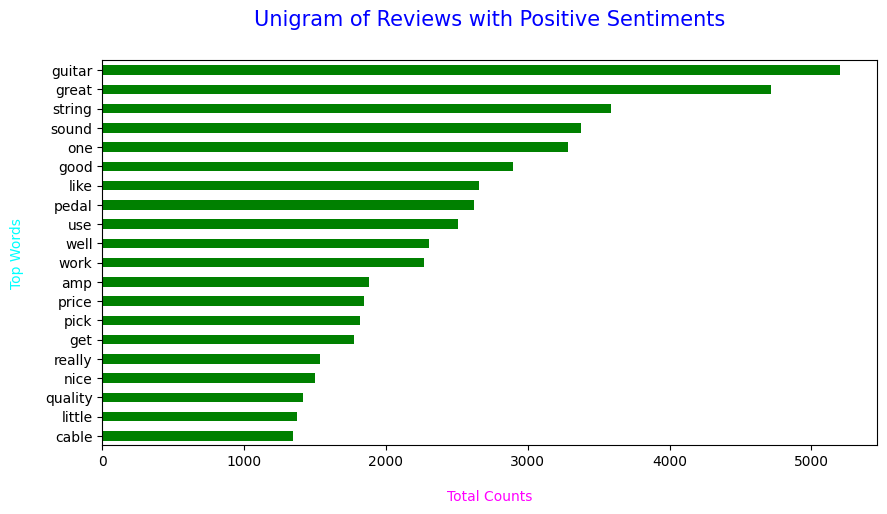

In [39]:
# Finding Unigram
# words = Gram_Analysis(Positive["reviews"], 1, 20)
# Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# # Visualization
# Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
# plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
# plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
# plt.xticks(rotation = 0)
# plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
# plt.show()



words = Gram_Analysis(Corpus, 1, 20)
Unigram = pd.DataFrame(words, columns=["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(
    kind="barh", color="green", figsize=(10, 5)
)

# Adding Titles and Labels
plt.title("Unigram of Reviews with Positive Sentiments", loc="center", fontsize=15, color="blue", pad=25)
plt.xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
plt.xticks(rotation=0)
plt.ylabel("Top Words", color="cyan", fontsize=10, labelpad=15)

# Show Plot
plt.show()

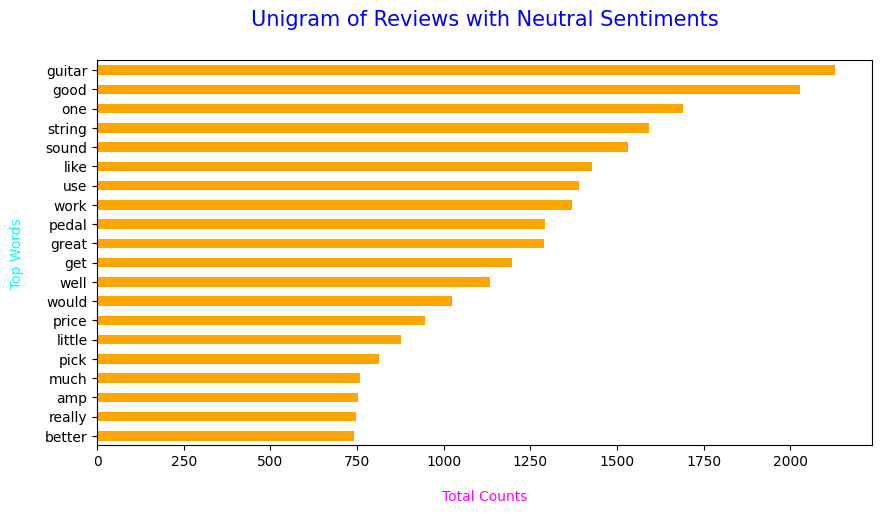

In [40]:
# Finding Unigram
words = Gram_Analysis(Neutral["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

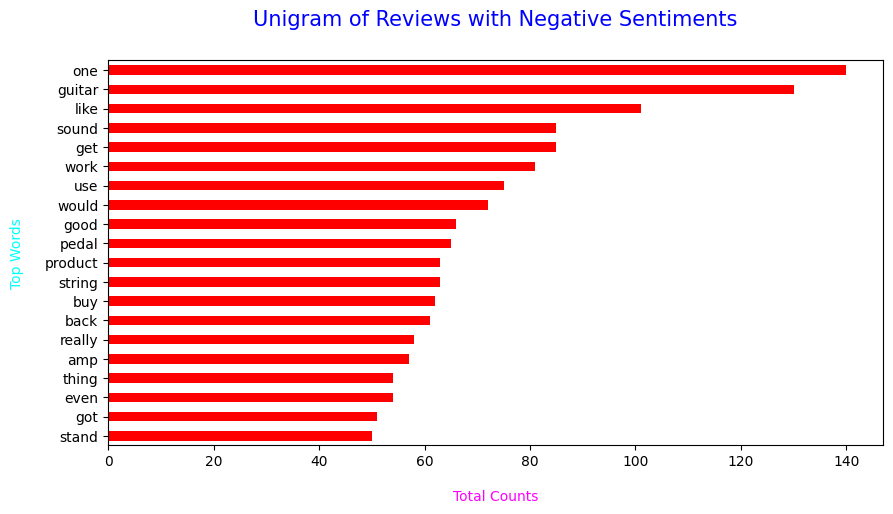

In [41]:
# Finding Unigram
words = Gram_Analysis(Negative["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

*These unigrams are not really accurate, because we can clearly see that even for postive sentiments, the top unigram is the wird `guitar` which is an object, though from here we might know that the most frequently bought items are guitars or the complement of it. We should try to find the bigram and see how accurate it can describe each sentiments*

**Bigram of Reviews Based On Sentiments**

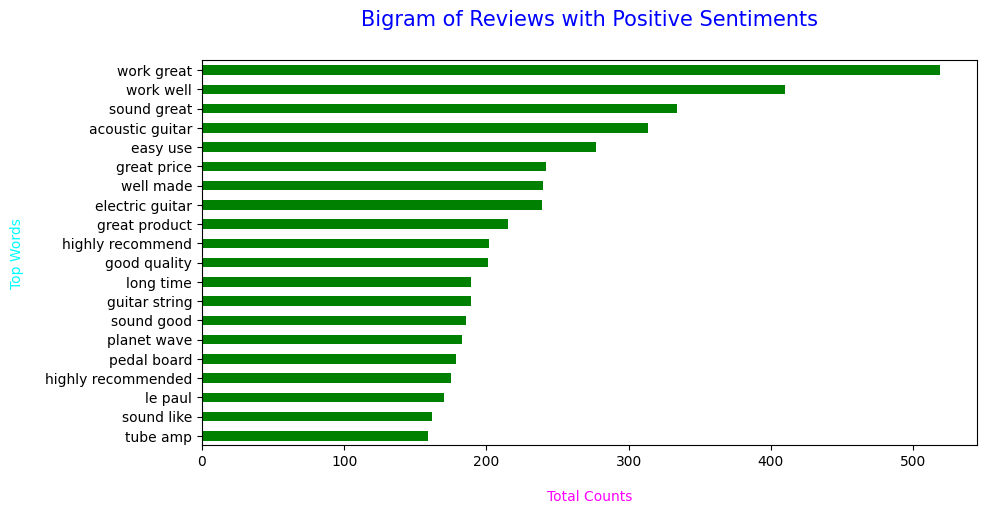

In [42]:
# Finding Bigram
words = Gram_Analysis(Positive["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()
     

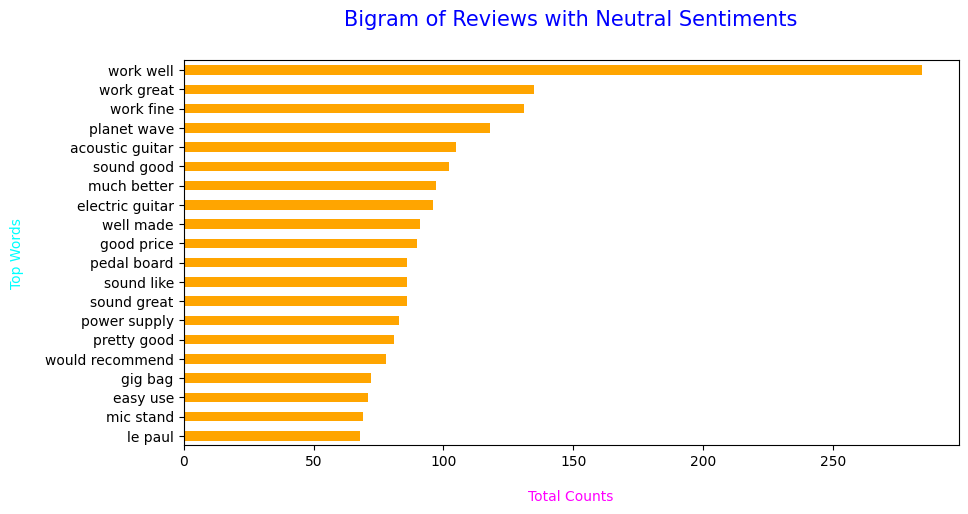

In [43]:
# Finding Bigram
words = Gram_Analysis(Neutral["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Bigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

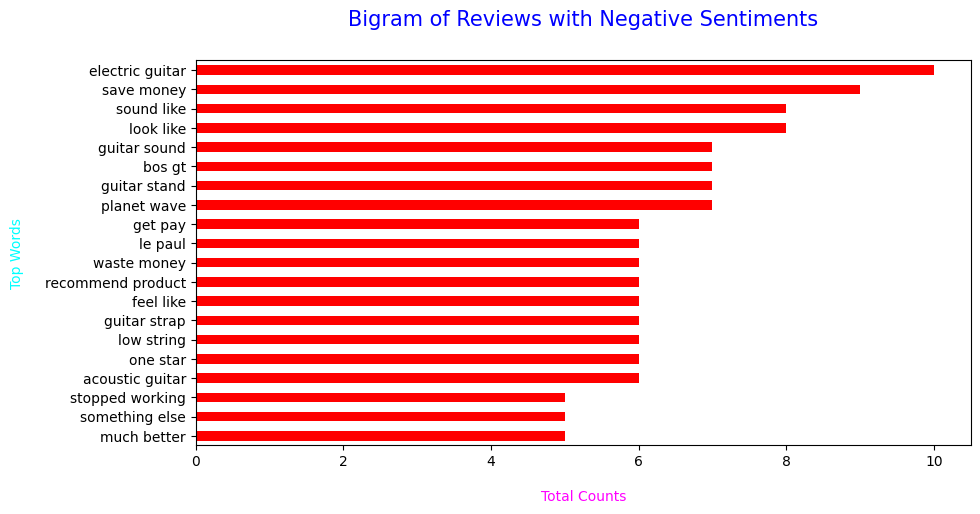

In [ ]:
# # Finding Bigram
# words = Gram_Analysis(Negative["reviews"], 2, 20)
# Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# # Visualization
# Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
# plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
# plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
# plt.xticks(rotation = 0)
# plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
# plt.show()

*The bigrams work better than the unigrams, because we can actually see some phrases that really describe what a good sentiment is. Although, in some parts we can still see guitar objects as the top words, which make us believe that our interpretation about the most selling items are related to guitars.*

**Trigram of Reviews Based On Sentiments**

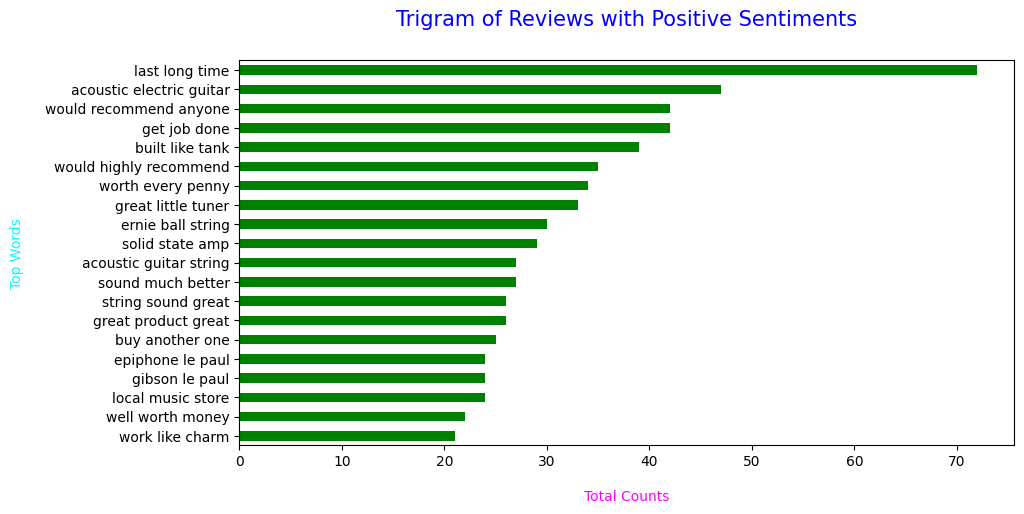

In [ ]:
# # Finding Trigram
# words = Gram_Analysis(Positive["reviews"], 3, 20)
# Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# # Visualization
# Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
# plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
# plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
# plt.xticks(rotation = 0)
# plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
# plt.show()

In [46]:
# # Finding Trigram
# words = Gram_Analysis(Neutral["reviews"], 3, 20)
# Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# # Visualization
# Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
# plt.title("Trigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
# plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
# plt.xticks(rotation = 0)
# plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
# plt.show()

In [47]:
# # Finding Trigram
# words = Gram_Analysis(Negative["reviews"], 3, 20)
# Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# # Visualization
# Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
# plt.title("Trigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
# plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
# plt.xticks(rotation = 0)
# plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
# plt.show()

*We can say that the trigrams are slightly better to describe each sentiments, although negative trigrams say a lot about bad products which we can infer from the top words above. From the N-Gram Analysis, we can also see how the decision of not removing `not` in our list of stopwords affects our data as we keep the meaning of negation phrases.*



---



# Word Clouds

**Word Cloud of Reviews with Positive Sentiments**

In [48]:
# wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["reviews"]))
# plt.figure(figsize = (15, 15))
# plt.imshow(wordCloud, interpolation = "bilinear")
# plt.axis("off")
# plt.show()

**Word Cloud of Reviews with Neutral Sentiments**

In [49]:
# wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["reviews"]))
# plt.figure(figsize = (15, 15))
# plt.imshow(wordCloud, interpolation = "bilinear")
# plt.axis("off")
# plt.show()

**Word Cloud of Reviews with Negative Sentiments**

In [50]:
# wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["reviews"]))
# plt.figure(figsize = (15, 15))
# plt.imshow(wordCloud, interpolation = "bilinear")
# plt.axis("off")
# plt.show()

*From these word clouds, not only we can see words that really describe our sentiments, but just like our N-Grams Analysis we can see objects being discussed in the reviews given.*



---



# Feature Engineering

**Drop Insignificant Columns**

In [51]:
Columns = ["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime", "polarity", "length", "word_counts", "overall"]
dataset.drop(columns = Columns, axis = 1, inplace = True)

*We dropped these columns to make our dataset concise. We now have two columns as our independent variables and the last column as dependent variables. To continue, we must encode our label as a set of numbers corresponding to each categories of it.*

**Current State of The Dataset**

In [52]:
pd.set_option('display.max_colwidth', None) 
dataset.head()

,reviews,sentiment
0,not much write exactly supposed filter pop sound recording much crisp one lowest price pop filter amazon might well buy honestly work despite pricing good,Positive
1,product exactly quite affordable not realized double screened arrived even better expected added bonus one screen carry small hint smell old grape candy used buy reminiscent sake not stop putting pop filter next nose smelling recording dif needed pop filter work well expensive one may even come pleasing aroma like mine buy product jake,Positive
2,primary job device block breath would otherwise produce popping sound allowing voice pas noticeable reduction volume high frequency double cloth filter block pop let voice coloration metal clamp mount attache mike stand secure enough keep attached goose neck need little coaxing stay put job well,Positive
3,nice windscreen protects mxl mic prevents pop thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging good windscreen money,Positive
4,pop filter great look performs like studio filter recording vocal eliminate pop get recorded sing pop record vocal,Positive


**Encoding Our Target Variable**

In [53]:
Encoder = LabelEncoder()
dataset["sentiment"] = Encoder.fit_transform(dataset["sentiment"])

In [54]:
dataset["sentiment"].value_counts()

sentiment
2    6938
1    3106
0     217
Name: count, dtype: int64

*We had successfully encoded our sentiment into numbers so that our model can easily figure it out. From above, we know that the label `Positive` is encoded into 2, `Neutral` into 1, and `Negative` into 0. Now, we have to give importance of each words in the whole review, i.e. giving them weights. We can do this by using TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer.*

**TF-IDF Vectorizer**

In [55]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(dataset["reviews"])

# Check our matrix shape
X.shape

(10261, 5000)

In [56]:
# Declaring our target variable
y = dataset["sentiment"]

*From the shape, we successfully transformed our reviews with TF-IDF Vectorizer of 7000 top bigram words. Now, as we know from before, our data is kind of imbalanced with very little neutral and negative values compared to positive sentiments. We need to balance our dataset before going into modelling process.*

**Resampling Our Dataset**

*There are many ways to do resampling to an imbalanced dataset, such as SMOTE and Bootstrap Method. We will use SMOTE (Synthetic Minority Oversampling Technique) that will randomly generate new replicates of our undersampling data to balance our dataset.*

In [57]:
Counter(y)

Counter({2: 6938, 1: 3106, 0: 217})

In [58]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [59]:
Counter(y_final)

Counter({2: 6938, 1: 6938, 0: 6938})

*Now our data is already balanced as we can see from the counter of each sentiment categories before and after the resampling with SMOTE.*

**Splitting Our Dataset**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42, stratify=y_final)

*We splitted our dataset into 75:25 portion respectively for the training and test set.*



---



# Model Selection and Evaluation

*We do not really know what is the best model that fits our data well. Because of that, we will need to try every classification models available and find the best models using the Confusion Matrix and F1 Score as our main metrics, and the rest of the metrics as our support. First, we should do some cross validation techniques in order to find the best model.*

**Model Building**

*We are using K-Fold Cross Validation on our early dataset (before resampling) because the CV itself is not affected by the imbalanced dataset as it splits the dataset and takes into account every validations. If we use the CV on the balanced dataset that we got from resampling we should be able to get similar result.*

In [61]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.6320037354014703
Logistic Regression Test Accuracy: 0.7156222537301817
SVC Test Accuracy: 0.7070453505829921
Random Forest Test Accuracy: 0.7011981565945591
Naive Bayes Test Accuracy: 0.6754670675390195
K-Neighbors Test Accuracy: 0.5973238164110916


*We got six models on our sleeves and from the results of 10-Fold Cross Validation, we know that the `Logistic Regression` model is the best model with the highest accuracy, slightly beating the `SVC`. Because of this, we will use the best model in predicting our sentiment, also to tune our parameter and evaluate the end-result of how well the model works.*

**Hyperparameter Tuning**

In [ ]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = 1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver

Best Accuracy: 83.16 %
Best Parameters: {'C': np.float64(4714.8663634573895), 'penalty': 'l2'}


c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*We got a nice accuracy on our training set, which is 94.80% and from our Grid Search, we are also able to find our optimal hyperparameters. It is time to finish our model using these parameters to get the best model of Logistic Regression.*

**Best Model**

In [63]:
Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Now that our model is done, we will test our model on our test set. The metrics that we will evaluate is based on this prediction that we made here.*

**Metrics**

Accuracy On Test Set

In [64]:
accuracy_score(y_test, Prediction)

0.8332052267486548

*Really high accuracy that we got here, 95.21%. Still, we need to look out for the Confusion Matrix and F1 Score to find out about our model performance.*

Confusion Matrix

In [65]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

Visualizing Our Confusion Matrix

In [66]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Actual Label", labelpad = 20)

Unnormalized Confusion Matrix


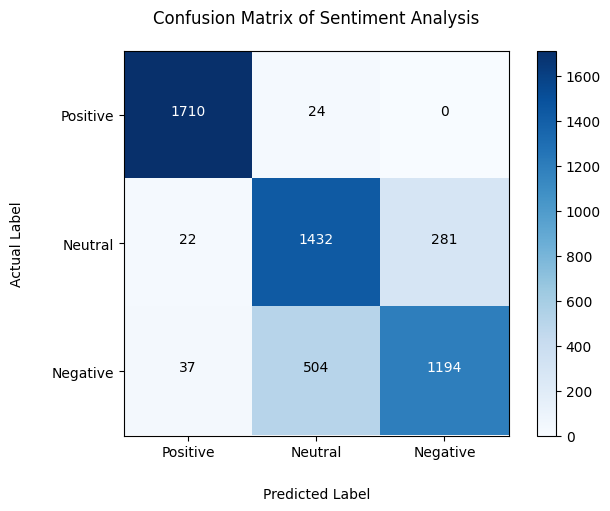

In [67]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

*What we can gain from the Confusion Matrix above is that the model overall works well. It is able to categorize both positive and neutral sentiments correctly, while it seems to struggle a bit at determining negative sentiments. Of course, this is the effect of imbalanced data that we got from our original dataset, and luckily we can minimize the effect thanks to our SMOTE resampling before.*

Classification Scores

In [68]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1734
           1       0.73      0.83      0.78      1735
           2       0.81      0.69      0.74      1735

    accuracy                           0.83      5204
   macro avg       0.84      0.83      0.83      5204
weighted avg       0.84      0.83      0.83      5204



*Overall, to each of our sentiment categories, we got F1 Score of 95%, which is great and because of that we can conclude that our model works well on the dataset.*



---



# Conclusion

**Dataset**



1.   Our dataset contains many features about user reviews on musical instruments. But, we rarely need those features as our model variables because those features are not really important for sentiment analysis.
2.   We might need to omit our part of removing stopwords in our preprocessing phase, because there might be some important words in determining user sentiments in our model.
3.   From our text analysis, we know that most of the transactions made are related to guitars or other string-based instruments. We can say that guitar got a really high attention from the customers' pool and the sellers can emphasize their products on this instruments.



**Model**



1.   We tried almost all classification models available. By using 10-Fold Cross Validation, we get that Logistic Regression Model got the best accuracy and we decided to use this model and tune it.
2.   On our attempt on making prediction to our test set, we also received a nice accuracy and high F1 Score. This means that our model works well on sentiment analysis.
3.   We need to consider more Cross Validation Method, such as Stratified K-Fold so that we do not really need to do resampling on our dataset. Also, we are fine without data scaling, but it is highly suggested to do it.





---



In [74]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [73]:
import nltk
print(nltk.data.path)

['C:\\Users\\ASUS/nltk_data', 'c:\\Users\\ASUS\\miniconda3\\nltk_data', 'c:\\Users\\ASUS\\miniconda3\\share\\nltk_data', 'c:\\Users\\ASUS\\miniconda3\\lib\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [75]:
import nltk
nltk.data.clear_cache()

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from textblob import TextBlob


# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords', force=True)
nltk.download('punkt', force=True)
nltk.download('averaged_perceptron_tagger', force=True)
nltk.download('averaged_perceptron_tagger_eng', force=True)

# Load dataset
dataset = pd.read_csv("Instruments_Reviews.csv")

# Filling missing values in reviewText
dataset.reviewText.fillna(value = "", inplace = True)
dataset["reviews"] = dataset["reviewText"] + " " + dataset["summary"]
dataset.drop(columns = ["reviewText", "summary"], axis = 1, inplace = True)

# Labeling sentiment based on 'overall' rating
def Labelling(Rows):
    if(Rows["overall"] > 4.0):
        Label = "Positive"
    elif(Rows["overall"] <= 2.0):
        Label = "Negative"
    else:
        Label = "Neutral"
    return Label

dataset["sentiment"] = dataset.apply(Labelling, axis = 1)

# Text cleaning
def Text_Cleaning(Text):
    Text = Text.lower()  # Lowercase the text
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))  # Remove punctuations
    Text = Text.translate(punc)
    Text = re.sub(r'\d+', '', Text)  # Remove numbers
    Text = re.sub('https?://\S+|www\.\S+', '', Text)  # Remove links
    Text = re.sub('\n', '', Text)  # Remove newlines
    return Text

# Removing stopwords and lemmatizing words
Stopwords = set(stopwords.words("english")) - set(["not"])
Lemmatizer = WordNetLemmatizer()

def Text_Processing(Text):
    Processed_Text = list()
    Tokens = nltk.word_tokenize(Text)
    Tagged_Tokens = pos_tag(Tokens)

    # Removing stopwords, lemmatizing words, and excluding nouns
    for word, tag in Tagged_Tokens:
        if word not in Stopwords and tag not in ['NN', 'NNS', 'NNP', 'NNPS']:  # Exclude nouns
            Processed_Text.append(Lemmatizer.lemmatize(word))

    return " ".join(Processed_Text)

# Applying text cleaning and processing to reviews
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Cleaning(Text))
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Processing(Text))

# Calculating sentiment polarity
dataset["polarity"] = dataset["reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

# Calculating review length and word counts
dataset["length"] = dataset["reviews"].astype(str).apply(len)
dataset["word_counts"] = dataset["reviews"].apply(lambda x: len(str(x).split()))

# Splitting data into Positive, Neutral, and Negative sentiment
Positive = dataset[dataset["sentiment"] == "Positive"].dropna()
Neutral = dataset[dataset["sentiment"] == "Neutral"].dropna()
Negative = dataset[dataset["sentiment"] == "Negative"].dropna()

# Label encoding for the target variable
Encoder = LabelEncoder()
dataset["sentiment"] = Encoder.fit_transform(dataset["sentiment"])

# TF-IDF Vectorization (Bigram Model)
TF_IDF = TfidfVectorizer(max_features=5000, ngram_range=(2, 2))

# Fitting and transforming reviews into a matrix of weighed words
X = TF_IDF.fit_transform(dataset["reviews"])

# Declaring the target variable
y = dataset["sentiment"]

# Handling class imbalance with SMOTE
Balancer = SMOTE(random_state=42)
X_final, y_final = Balancer.fit_resample(X, y)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42, stratify=y_final)

# Initializing models
Models = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    BernoulliNB(),
    KNeighborsClassifier()
]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

# Evaluating models with cross-validation accuracy
for i, model in enumerate(Models):
    print(f"{Models_Dict[i]} Test Accuracy: {cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()}")

# Hyperparameter tuning for Logistic Regression using Grid Search
param_grid = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, scoring="accuracy", cv=10, verbose=0, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(f"Best Accuracy: {best_accuracy*100:.2f} %")
print("Best Parameters:", best_parameters)

# Train the model with the best parameters
Classifier = LogisticRegression(random_state=42, C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'])
Classifier.fit(X_train, y_train)

# Predicting on the test set
Prediction = Classifier.predict(X_test)

# Evaluating the model performance
print("Accuracy on Test Data:", accuracy_score(y_test, Prediction))
print("Classification Report:\n", classification_report(y_test, Prediction))



<>:60: SyntaxWarning: invalid escape sequence '\S'
<>:60: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10720\2131075566.py:60: SyntaxWarning: invalid escape sequence '\S'
  Text = re.sub('https?://\S+|www\.\S+', '', Text)  # Remove links
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10

Decision Tree Test Accuracy: 0.6216733953242947
Logistic Regression Test Accuracy: 0.6937910338976296
SVC Test Accuracy: 0.6933048433048434
Random Forest Test Accuracy: 0.6812199274557702
Naive Bayes Test Accuracy: 0.6567562745444158
K-Neighbors Test Accuracy: 0.6031618996642314


c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver

Best Accuracy: 80.68 %
Best Parameters: {'C': np.float64(6866.488450042998), 'penalty': 'l2'}
Accuracy on Test Data: 0.8164873174481169
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      1734
           1       0.74      0.81      0.77      1735
           2       0.83      0.64      0.72      1735

    accuracy                           0.82      5204
   macro avg       0.82      0.82      0.81      5204
weighted avg       0.82      0.82      0.81      5204



c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# data_processing.py
# Creates processed_reviews.csv with negation-aware, noun-removed, lemmatized text

import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer

# ---- NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
# Newer NLTK may require the _eng tagger; download both to be safe
nltk.download('averaged_perceptron_tagger', quiet=True)
try:
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)
except Exception:
    pass

# ---- Config
NEGATORS = {"not", "no", "never", "n't"}
PUNCT_BREAK = {'.', '!', '?', ';', ',', ':'}

# ---- Helpers
def label_row(overall: float) -> str:
    if overall > 4.0:
        return "Positive"
    elif overall <= 2.0:
        return "Negative"
    else:
        return "Neutral"

def text_cleaning(text: str) -> str:
    if not isinstance(text, str):
        text = "" if pd.isna(text) else str(text)
    text = text.lower()
    # Remove links, numbers, punctuation → space
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)  # raw string to avoid warnings
    text = re.sub(r'\d+', ' ', text)
    # Keep punctuation as separate tokens for negation breaks
    # (We'll handle punctuation via tokenizer; no need to strip here fully)
    text = text.replace('\n', ' ')
    # Compact spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Keep 'not' in vocabulary (don’t remove)
STOPWORDS = set(stopwords.words('english')) - {"not"}
LEMM = WordNetLemmatizer()

def text_processing_negation_and_pos(text: str) -> str:
    """
    - Tokenize
    - Apply negation scope: after a negator, append _NEG to subsequent tokens until punctuation
    - Remove stopwords
    - Remove NOUNS (NN, NNS, NNP, NNPS)
    - Lemmatize
    """
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    out = []
    negate = False

    for (tok, tag) in tagged:
        low = tok.lower()

        # punctuation → end negation scope
        if low in PUNCT_BREAK:
            negate = False
            continue

        # Start/keep negation scope
        if low in NEGATORS:
            negate = True
            # keep the negator token itself (helps model)
            if low not in STOPWORDS:
                out.append(LEMM.lemmatize(low))
            continue

        # Skip nouns
        if tag in ('NN', 'NNS', 'NNP', 'NNPS'):
            continue

        # Skip stopwords
        if low in STOPWORDS:
            continue

        base = LEMM.lemmatize(low)
        if negate:
            base = base + "_NEG"
        out.append(base)

    return " ".join(out)

def main():
    # ---- Load
    df = pd.read_csv("Instruments_Reviews.csv")

    # Robust combine
    df["reviewText"] = df["reviewText"].astype(str).fillna("")
    df["summary"]    = df["summary"].astype(str).fillna("")
    df["reviews_raw"] = (df["reviewText"] + " " + df["summary"]).str.strip()

    # Label
    df["sentiment"] = df["overall"].apply(label_row)

    # Clean + Process
    df["reviews_clean"] = df["reviews_raw"].apply(text_cleaning)
    df["reviews"] = df["reviews_clean"].apply(text_processing_negation_and_pos)

    # Optional extras (length features)
    df["length"] = df["reviews"].str.len()
    df["word_counts"] = df["reviews"].str.split().str.len()

    # Save a compact processed file
    out = df[["reviews", "sentiment", "length", "word_counts"]].copy()
    out.to_csv("processed_reviews.csv", index=False)
    print("wrote processed_reviews.csv")
    print(out.head(3))

if __name__ == "__main__":
    main()


✅ wrote processed_reviews.csv
                                             reviews sentiment  length  \
0  not much_NEG write_NEG exactly 's supposed sou...  Positive     110   
1  exactly quite affordable.i not realized_NEG do...  Positive     272   
2  primary block would otherwise produce allowing...  Positive     143   

   word_counts  
0           18  
1           37  
2           21  


In [ ]:
# model_train.py
# Trains models on processed_reviews.csv and prints Accuracy, Precision, Recall, F1, report & confusion matrix

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            precision_recall_fscore_support)
from imblearn.over_sampling import SMOTE

# ---- Load processed file
df = pd.read_csv("processed_reviews.csv")

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df["sentiment"].values)
X_text = df["reviews"].astype(str).values

# TF-IDF (use 1–2 grams so the `_NEG` tokens are learned)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), sublinear_tf=True, norm="l2", max_df=0.9, min_df=2)
X = tfidf.fit_transform(X_text)

# (Kept exactly as your original approach) Handle class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_final, y_final = sm.fit_resample(X, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.25, random_state=42, stratify=y_final
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report # type: ignore

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # pyright: ignore[reportUnknownMemberType, reportUnknownArgumentType]

# Predict on the test set
rf_predictions = rf_model.predict(X_test) # type: ignore

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}") # type: ignore
print(f"Classification Report:\n{classification_report(y_test, rf_predictions)}") # type: ignore


Accuracy: 0.8854727132974635
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1734
           1       0.83      0.84      0.84      1735
           2       0.84      0.82      0.83      1735

    accuracy                           0.89      5204
   macro avg       0.89      0.89      0.89      5204
weighted avg       0.89      0.89      0.89      5204



In [15]:
from sklearn.ensemble import VotingClassifier

# Define the ensemble model with soft voting
ensemble_model_soft = VotingClassifier(estimators=[('rf', rf_model), 
                                                ('logreg', LogisticRegression(random_state=42, C=1, penalty='l2')),
                                                ('svm', SVC(probability=True, random_state=42))], 
                                    voting='soft')

# Train the ensemble model
ensemble_model_soft.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_predictions_soft = ensemble_model_soft.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, ensemble_predictions_soft)}")

Accuracy: 0.9077632590315142


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)),
    ('logreg', LogisticRegression(random_state=42, C=1, penalty='l2'))
]

# Meta-model (Logistic Regression as final predictor)
meta_model = LogisticRegression()

# Define the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
stacking_predictions = stacking_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, stacking_predictions)}")


Accuracy: 0.8822059953881629


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Define models
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
logreg_model = LogisticRegression(C=1, penalty='l2', solver='liblinear')
svm_model = SVC(probability=True, kernel='rbf', random_state=42)

# Define ensemble model with soft voting
ensemble_model_soft = VotingClassifier(
    estimators=[('rf', rf_model), ('logreg', logreg_model), ('svm', svm_model)], 
    voting='soft'
)

# Train the ensemble model
ensemble_model_soft.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_predictions_soft = ensemble_model_soft.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, ensemble_predictions_soft)}")


c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Accuracy: 0.8710607225211375
